To obtain the data to run this tutorial, download the tar.gz file from https://zenodo.org/records/10668525 and unzip it. Then run the creating_h5 tutorial to create a .h5 file to use with this tutorial. Then set example_h5_filepath to be the path to that .h5 file.

Once you have run the tutorial on the sample simulation, you can also try downloading a file from the MAYA catalog in the MAYA format (https://cgp.ph.utexas.edu/waveform) and using it with the tutorial.

# Gravitational Waves

In [1]:
from mayawaves.coalescence import Coalescence
import matplotlib.pyplot as plt
import numpy as np

## Create a Coalescence object using the simulation h5 file

In [2]:
example_h5_filename = "D11_q5_a1_-0.362_-0.0548_-0.64_a2_-0.0013_0.001_-0.0838_m533.33.h5"

In [3]:
coalescence = Coalescence(example_h5_filename)

## Read the $\Psi_4$ data for a given mode and extraction radius
### Note that the initial ~(75 + extraction_radius) M will be junk radiation and should be cut off for most analyses. That time is marked in the following tutorial with a vertical dashed line.

In [4]:
time_psi4, real, imag = coalescence.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=75)

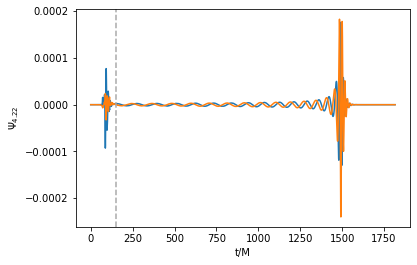

In [5]:
plt.plot(time_psi4, real)
plt.plot(time_psi4, imag)
plt.xlabel('t/M')
plt.ylabel(r'$\Psi_{4. 22}$')
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.show()

## Read the strain data for a given mode and extraction radius

In [6]:
time_strain, rh_plus, rh_cross = coalescence.strain_for_mode(l=2, m=2, extraction_radius=75)

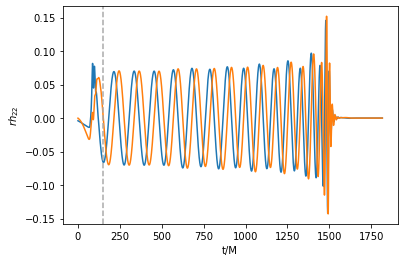

In [7]:
plt.plot(time_strain, rh_plus)
plt.plot(time_strain, rh_cross)
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$rh_{22}$')
plt.show()

## If no extraction radius is given, the radiation is extrapolated to infinite radius

In [8]:
time_strain_extrapolated, rh_plus_extrapolated, rh_cross_extrapolated = coalescence.strain_for_mode(l=2, m=2)

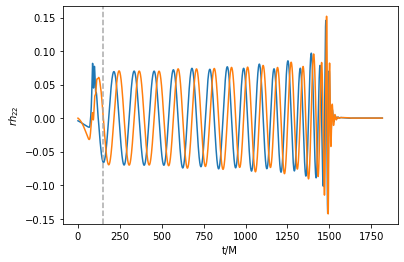

In [9]:
plt.plot(time_strain_extrapolated, rh_plus_extrapolated)
plt.plot(time_strain_extrapolated, rh_cross_extrapolated)
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$rh_{22}$')
plt.show()

## Recombine the modes to obtain the strain at a given sky location

In [10]:
time_strain, rh_plus, rh_cross = coalescence.strain_recomposed_at_sky_location(theta=0, phi=0)

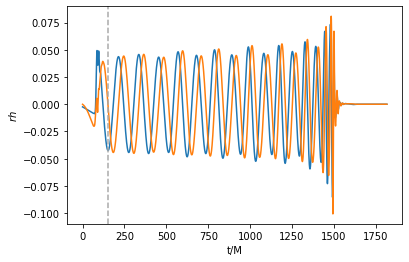

In [11]:
plt.plot(time_strain, rh_plus)
plt.plot(time_strain, rh_cross)
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$rh$')
plt.show()

In [12]:
time_strain, rh_plus, rh_cross = coalescence.strain_recomposed_at_sky_location(theta=np.pi/8, phi=0)

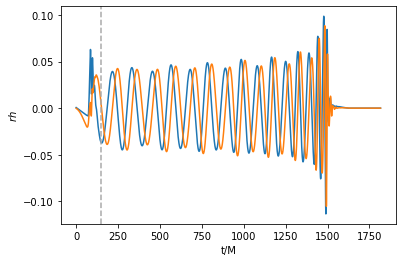

In [13]:
plt.plot(time_strain, rh_plus)
plt.plot(time_strain, rh_cross)
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$rh$')
plt.show()

## Correct for center of mass drift by changing the frame of the radiation extraction
### When correcting for center of mass drift, the junk radiation is cut off before sending the data to the scri package.

In [14]:
coalescence.set_radiation_frame(center_of_mass_corrected=True)
time_strain_com, rh_plus_com, rh_cross_com = coalescence.strain_for_mode(l=2, m=2)

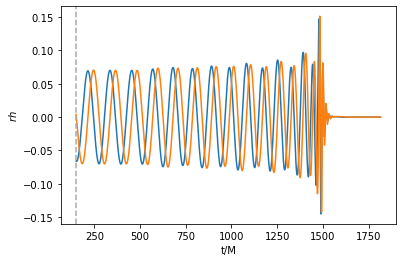

In [15]:
plt.plot(time_strain_com, rh_plus_com)
plt.plot(time_strain_com, rh_cross_com)
plt.axvline(x=150, c='#a9a9a9', linestyle='--')
plt.xlabel('t/M')
plt.ylabel(r'$rh$')
plt.show()

## Reset to the original frame

In [16]:
coalescence.set_radiation_frame()

## Close the Coalescence object to close the associated h5 file

In [17]:
coalescence.close()